# **1. Import Libraries**



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from pandas import Series, DataFrame
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
np.random.seed(500)
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# **2. Import Data & Concatenate White and Red wine datasets**

In [20]:
Red = pd.read_csv('winequality-red.csv', sep=';')
White = pd.read_csv('winequality-white.csv', sep=';')
Red['type'] = 'red'
White['type'] = 'white'
wine = pd.concat([Red, White])
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# **Data Shuffling**

In [21]:
wine = wine.sample(frac=1).reset_index(drop=True)
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.190,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,white
1,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7,red
2,5.7,0.290,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4,5,white
3,6.1,0.105,0.31,1.3,0.037,55.0,145.0,0.99120,3.41,0.41,11.1,7,white
4,6.2,0.350,0.29,7.3,0.044,56.0,244.0,0.99560,3.36,0.55,10.0,6,white


In [22]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# **3.Examining data analysis of the dataset**

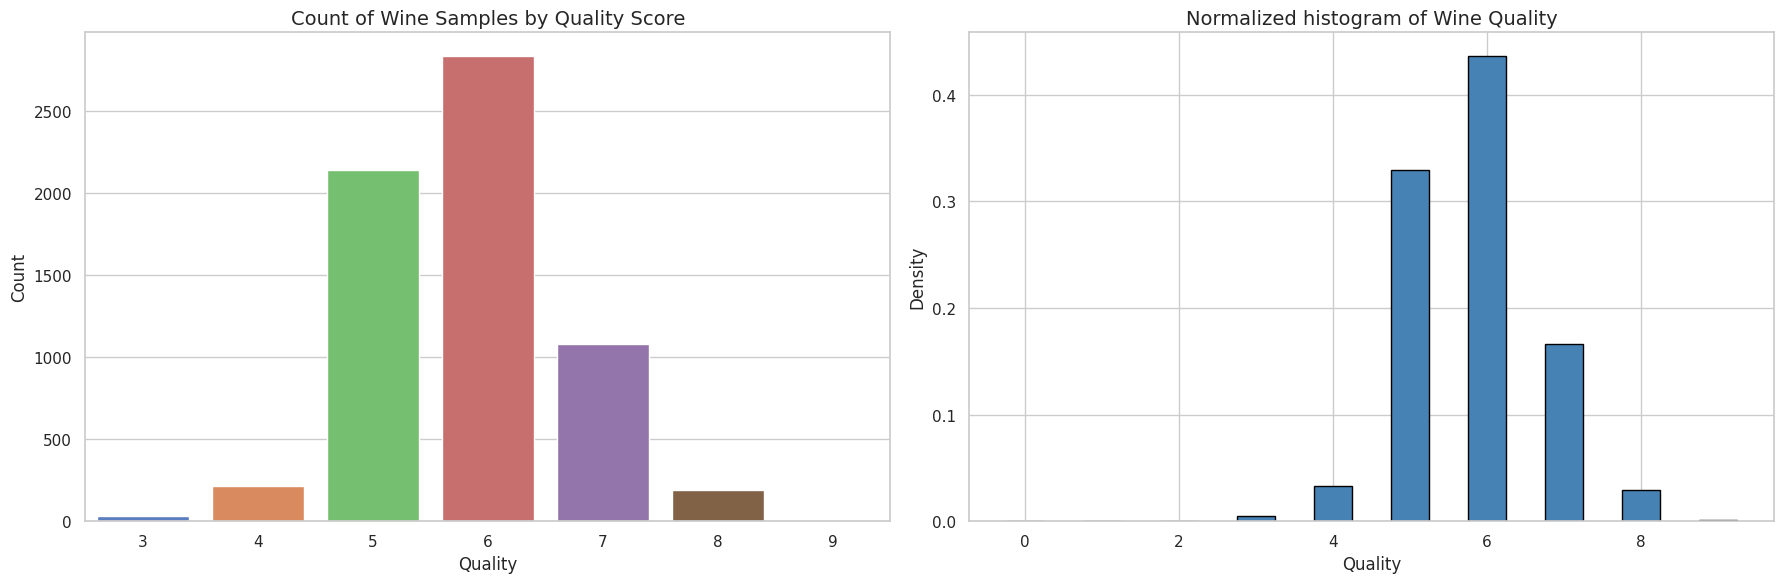

In [23]:
# set general style
sns.set(style="whitegrid")

# create the figure and subplots
fig = plt.figure(figsize=(18, 6))

# count plot (left)
ax1 = plt.subplot(1, 2, 1)
sns.countplot(data=wine, x='quality', ax=ax1, palette='muted')
ax1.set_title("Count of Wine Samples by Quality Score", fontsize=14)
ax1.set_xlabel("Quality", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

# histogram with density (right)
ax2 = plt.subplot(1, 2, 2)
ax2.hist(wine['quality'], bins=np.arange(11)-0.5, rwidth=0.5, density=True, color='steelblue', edgecolor='black')
ax2.set_title("Normalized histogram of Wine Quality", fontsize=14)
ax2.set_xlabel("Quality", fontsize=12)
ax2.set_ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()



Text(0, 0.5, 'density')

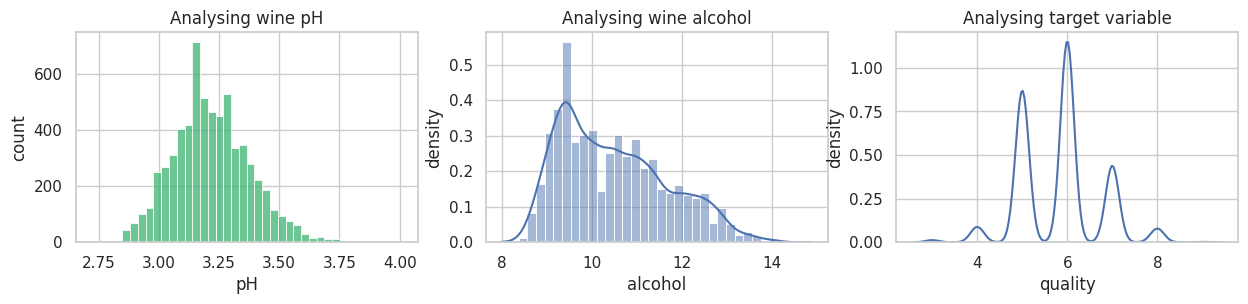

In [24]:
fig = plt.figure(figsize=(15,6))

plt.subplot2grid((2,3),(0,0))
sns.histplot(wine['pH'], bins=40, kde=False, color='mediumseagreen')
plt.title("Analysing wine pH")
plt.ylabel("count")
plt.xlabel("pH")

plt.subplot2grid((2,3),(0,1))
sns.histplot(wine['alcohol'], kde=True, stat='density')
plt.title("Analysing wine alcohol")
plt.ylabel("density")
plt.xlabel("alcohol")

plt.subplot2grid((2,3),(0,2))
sns.kdeplot(wine.query('quality > 2').quality)
plt.title("Analysing target variable")
plt.xlabel("quality")
plt.ylabel("density")


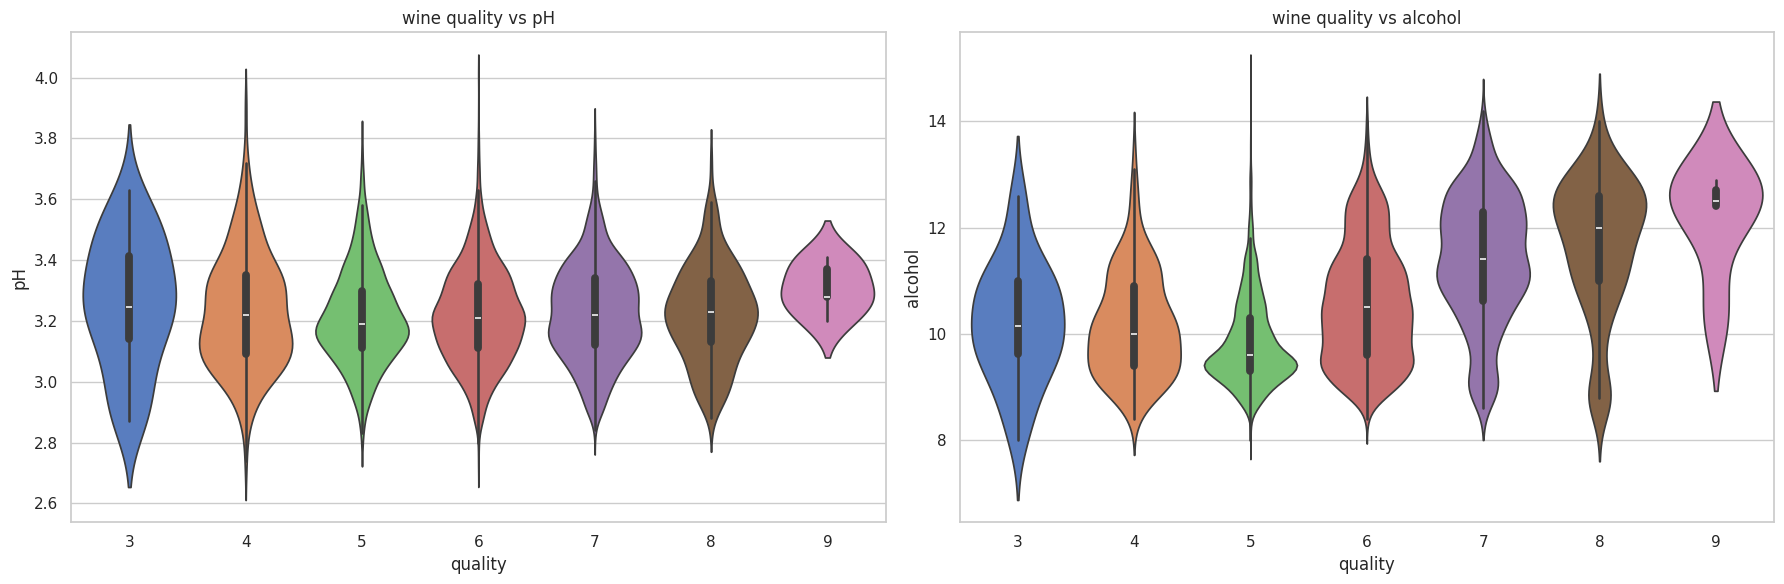

In [25]:
# plotting wine quality vs. pH/alcohol
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(data=wine, x='quality', y='pH', ax=axes[0], palette='muted')
axes[0].set_title("wine quality vs pH")
axes[0].set_xlabel("quality")
axes[0].set_ylabel("pH")

sns.violinplot(data=wine, x='quality', y='alcohol', ax=axes[1], palette='muted')
axes[1].set_title("wine quality vs alcohol")
axes[1].set_xlabel("quality")
axes[1].set_ylabel("alcohol")

plt.tight_layout()
plt.show()


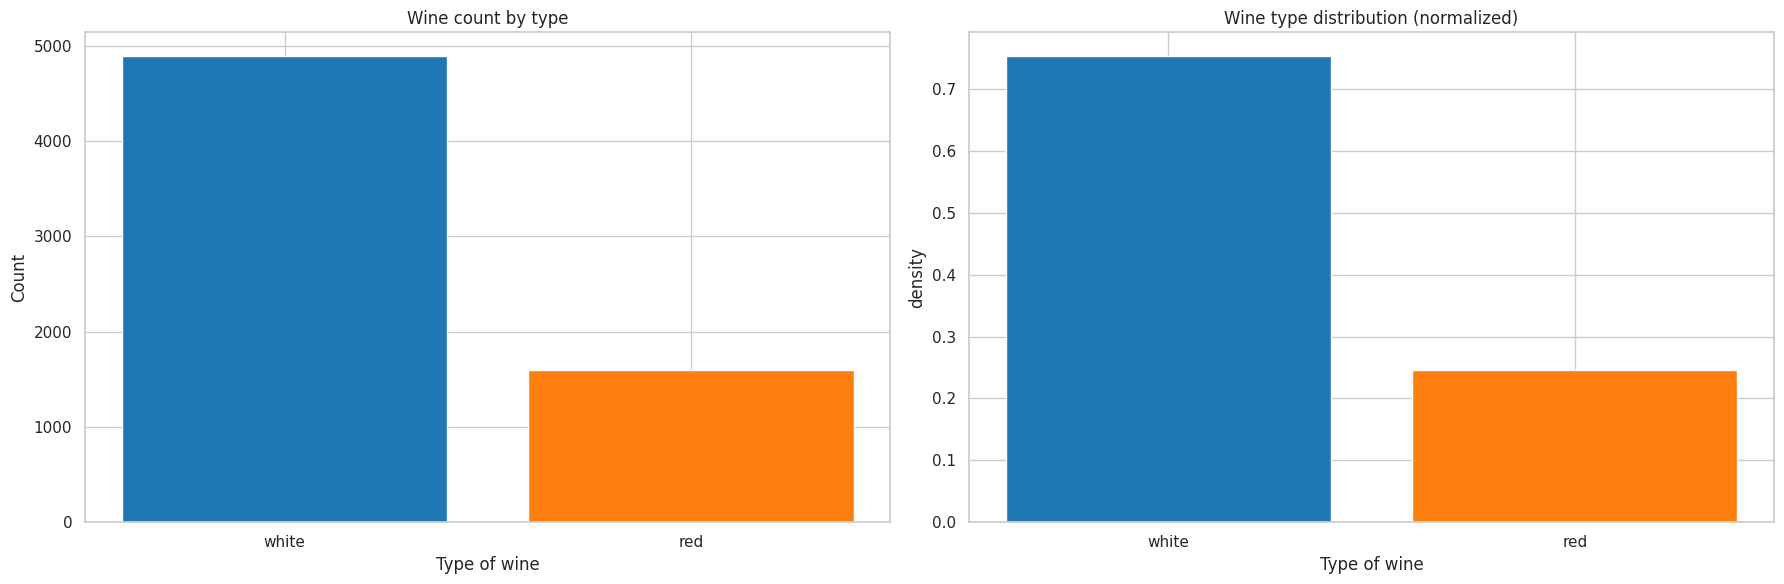

In [26]:

wine_counts = wine['type'].value_counts()
wine_props = wine_counts / wine_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# plot count of each wine type
axes[0].bar(wine_counts.index, wine_counts.values, color=['#1f77b4', '#ff7f0e'])
axes[0].set_title("Wine count by type")
axes[0].set_xlabel("Type of wine")
axes[0].set_ylabel("Count")

# plot normalized proportions
axes[1].bar(wine_props.index, wine_props.values, color=['#1f77b4', '#ff7f0e'])
axes[1].set_title("Wine type distribution (normalized)")
axes[1].set_xlabel("Type of wine")
axes[1].set_ylabel("density")

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Density')

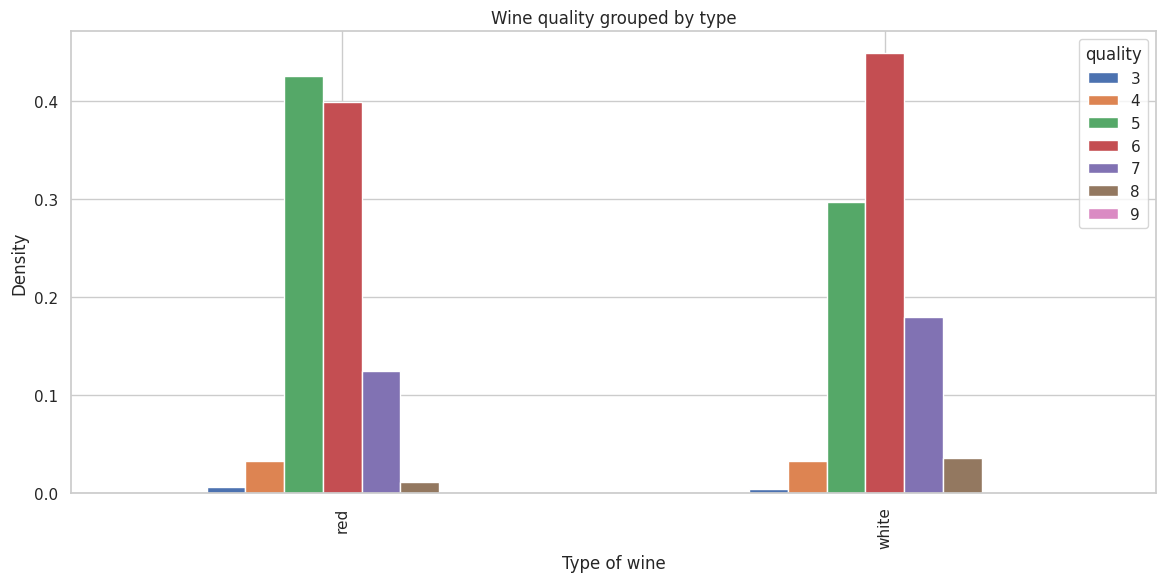

In [27]:
group_table = pd.crosstab(index=wine['type'], columns=wine['quality'])

# normalize by row totals
normalized = group_table.div(group_table.sum(axis=1), axis=0)
# create bar plot
fig, axis = plt.subplots(figsize=(14, 6))
normalized.plot(kind='bar', ax=axis)

axis.set_title("Wine quality grouped by type")
axis.set_xlabel("Type of wine")
axis.set_ylabel("Density")


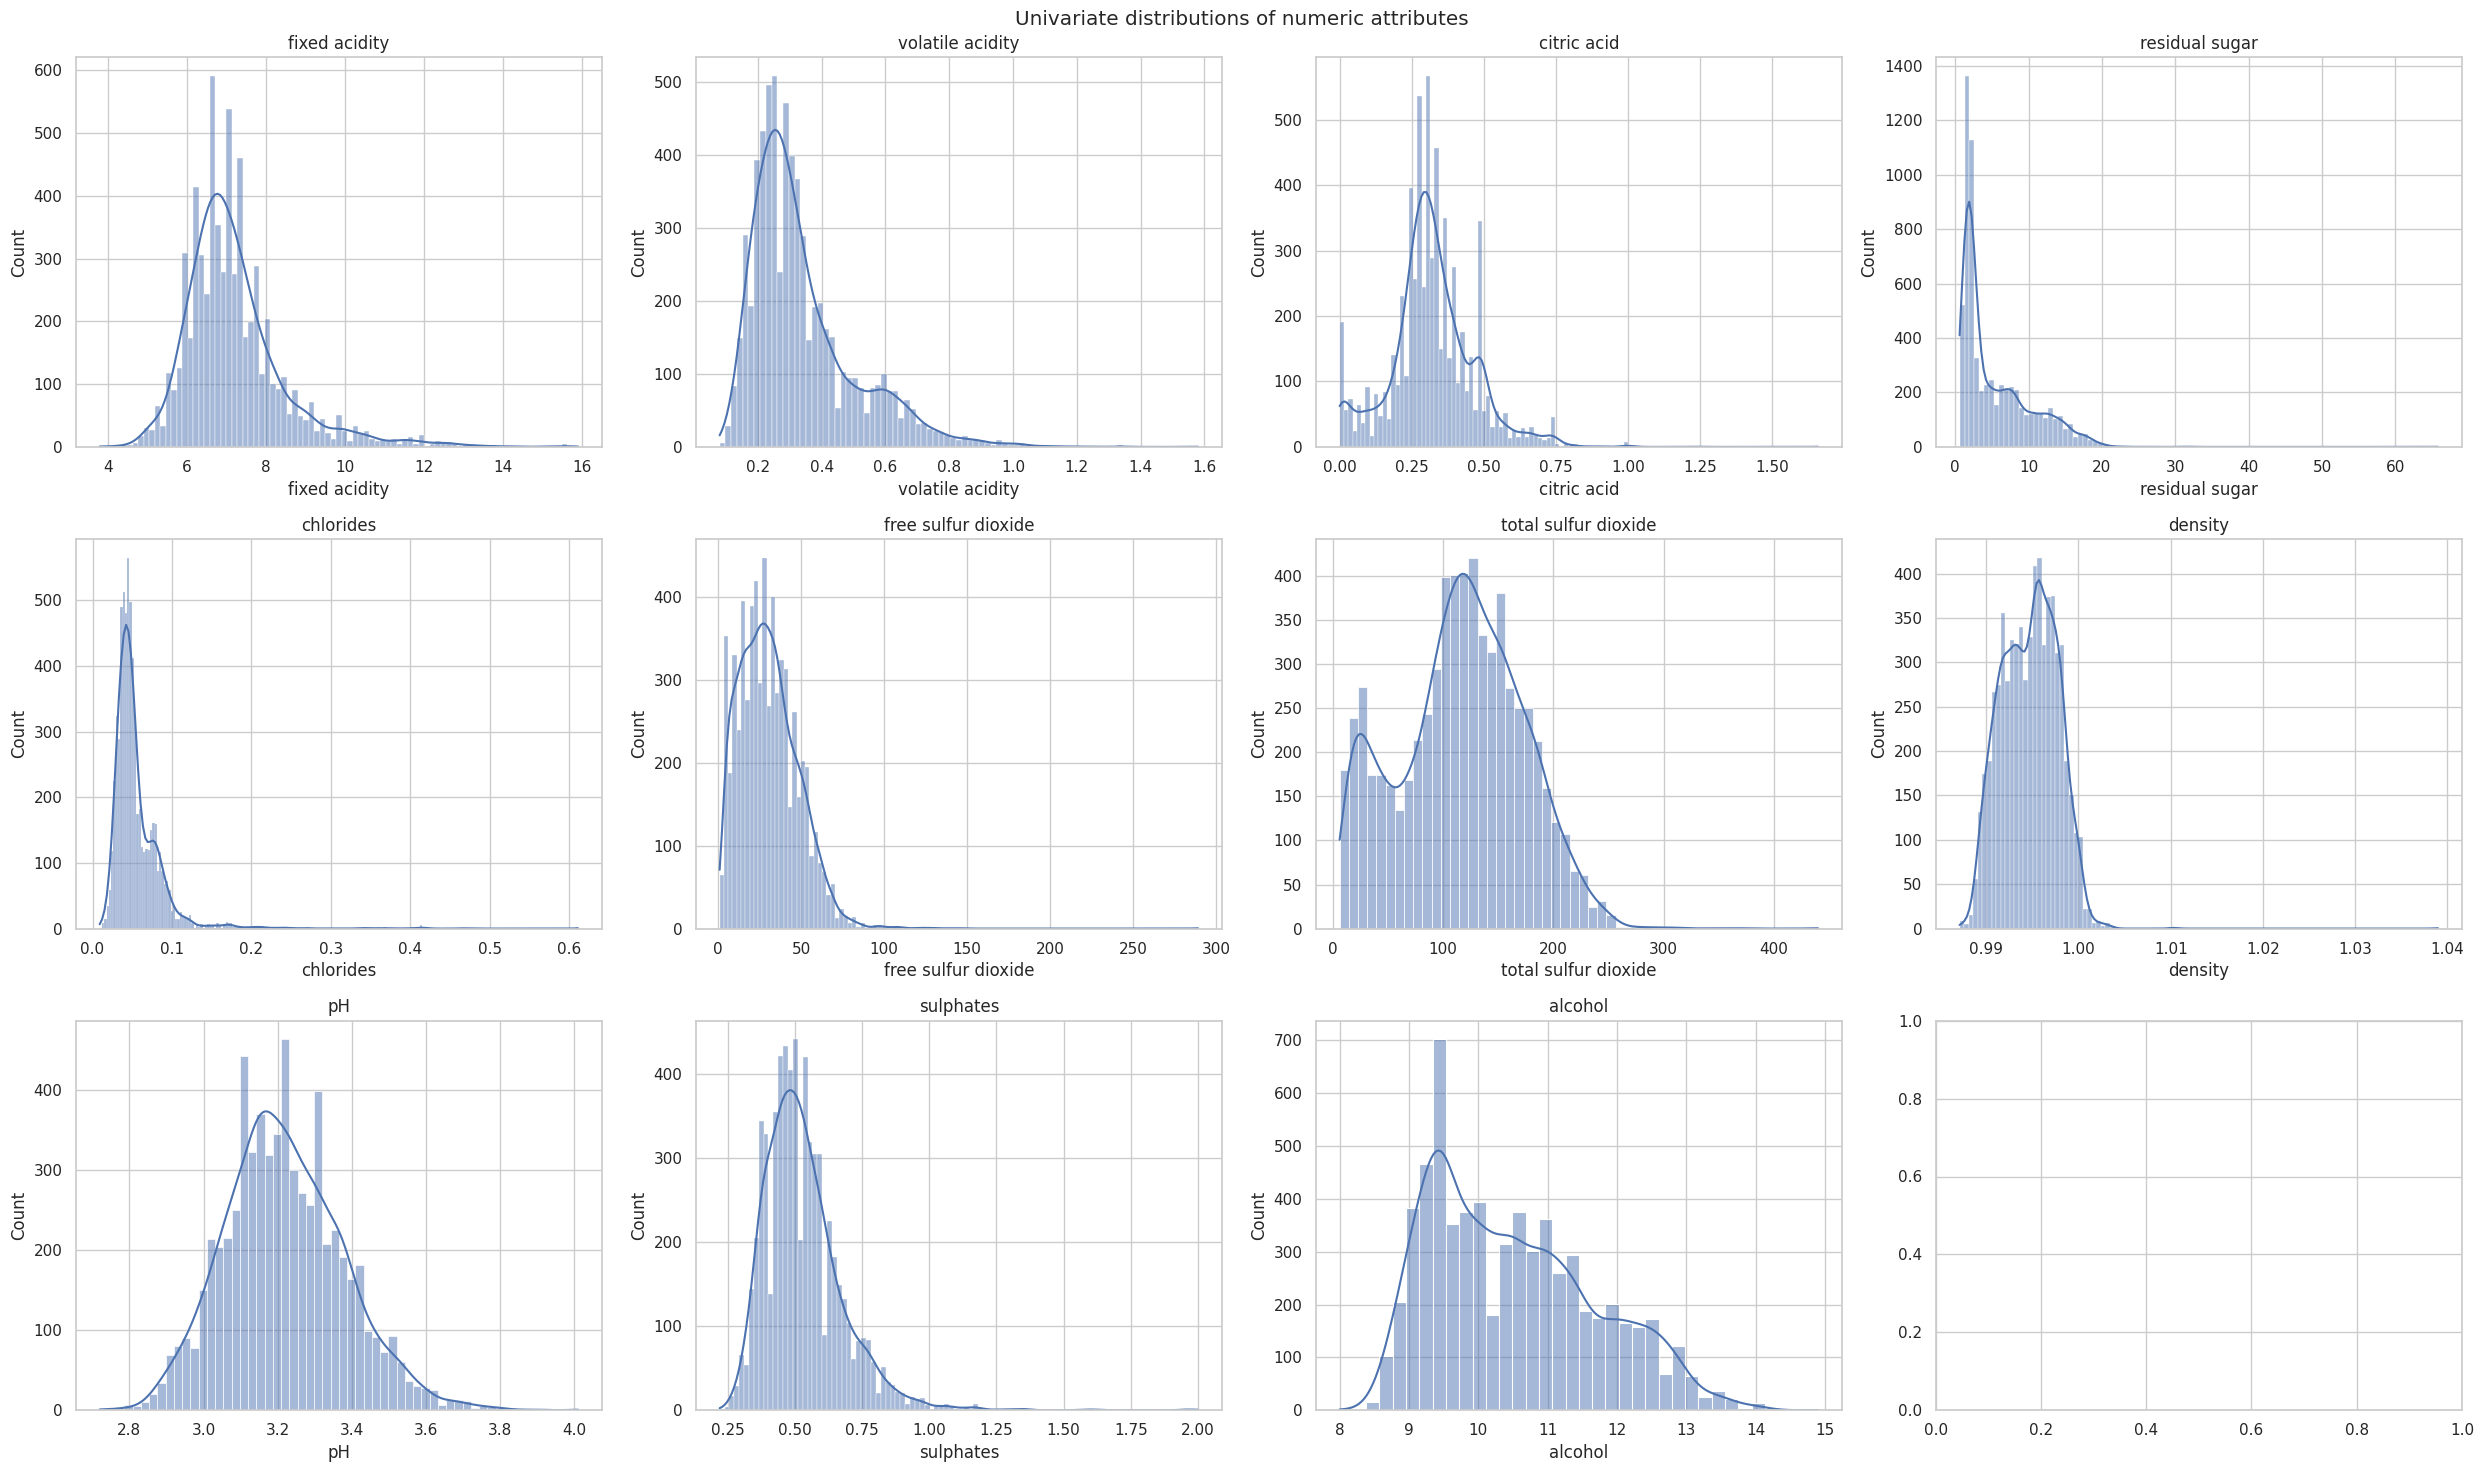

In [28]:
# # Multiple Plots for identifying all continous (numeric) features, excuding type & quality
canvas, panels = plt.subplots(3, 4, figsize=(25, 15))

# get list of all numerical columns excluding label and type
features = [col for col in wine.columns if col not in ['quality', 'type']]

# flatten axes array
panels = panels.flatten()

# loop through features and draw distplots
for idx, feature in enumerate(features):
    sns.histplot(data=wine, x=feature, kde=True, ax=panels[idx])
    panels[idx].set_title(feature)

# overall title
plt.suptitle("Univariate distributions of numeric attributes")
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Correlation with quality by feature'}>

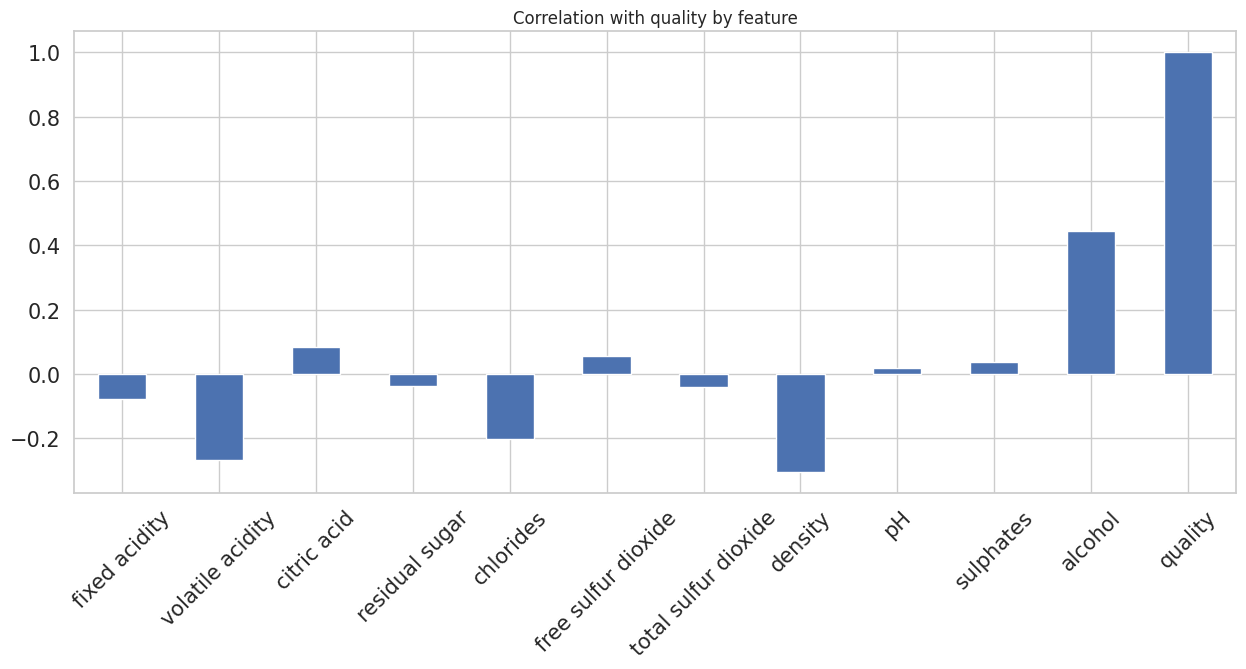

In [29]:
wine.drop(columns='type').corrwith(wine['quality']).plot.bar(
    figsize=(15, 6),
    title="Correlation with quality by feature",
    fontsize=15,
    rot=45,
    grid=True
)

# **4. Visualizing Red vs White Wine With 2D PCA projection**

  In this section, PCA (principal component analysis) is applied to project all continous wine attributes into 2d space. basically reducing feature space.

Text(0.5, 1.0, 'PCA projection: White (left) vs Red (right) wine')

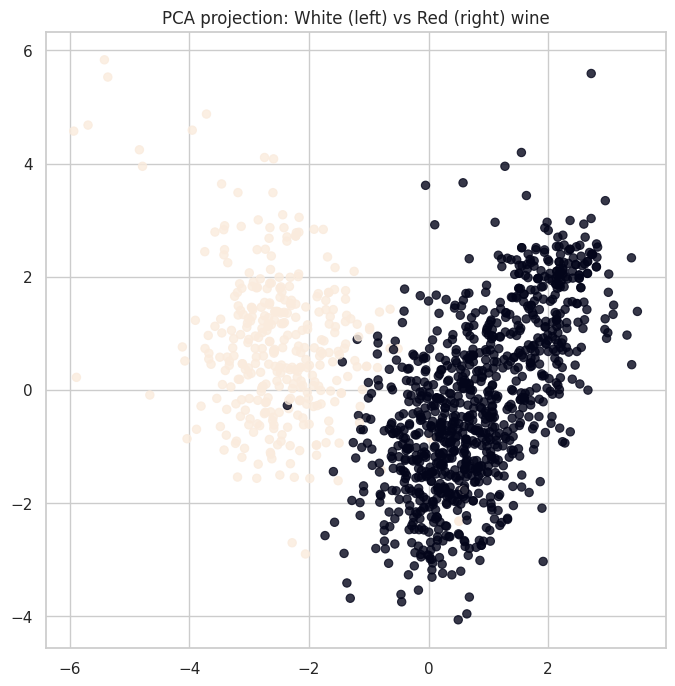

In [30]:
# standardize features
scaler = StandardScaler()
pca_2d = PCA(n_components=2)

# encode wine type: red : 1, white : 0
wine_labels = (wine['type'] == 'red').astype(int).values

# create list of numeric features (excluding type and quality)
continuous_features = [col for col in wine.columns if col not in ['type', 'quality']]
# select featrues and transform to scaled form
numeric_only = wine[continuous_features]
scaled_data = scaler.fit_transform(numeric_only)

# project to 2d using pca
reduced = pca_2d.fit_transform(scaled_data)

# visualize first 20% of the data points
fig, ax = plt.subplots(figsize=(8, 8))
limit = int(0.2 * len(wine))
ax.scatter(reduced[:limit, 0], reduced[:limit, 1], c=wine_labels[:limit], alpha=0.8, linewidth=0.8)
ax.set_title("PCA projection: White (left) vs Red (right) wine")


# **5. Classification Of Target Variable**

In this section we convert the original wine quality score into a binay classification problem. wines with quality>=7 labled as "good"(1), quality< 7 labled as "bad" (0).

In [31]:
wine = wine.drop('type',axis=1)
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.190,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7
1,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7
2,5.7,0.290,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4,5
3,6.1,0.105,0.31,1.3,0.037,55.0,145.0,0.99120,3.41,0.41,11.1,7
4,6.2,0.350,0.29,7.3,0.044,56.0,244.0,0.99560,3.36,0.55,10.0,6


In [33]:
## create new binary target: 1 = good quality (>= 7), 0 = bad (< 7)
wine['seperate_quality'] = (wine['quality'] >= 7).astype(int)

# separate input features from target
features = wine.drop(columns=['seperate_quality', 'quality'])
target = wine['seperate_quality']
# check class distribution
print(target.value_counts())

seperate_quality
0    5220
1    1277
Name: count, dtype: int64


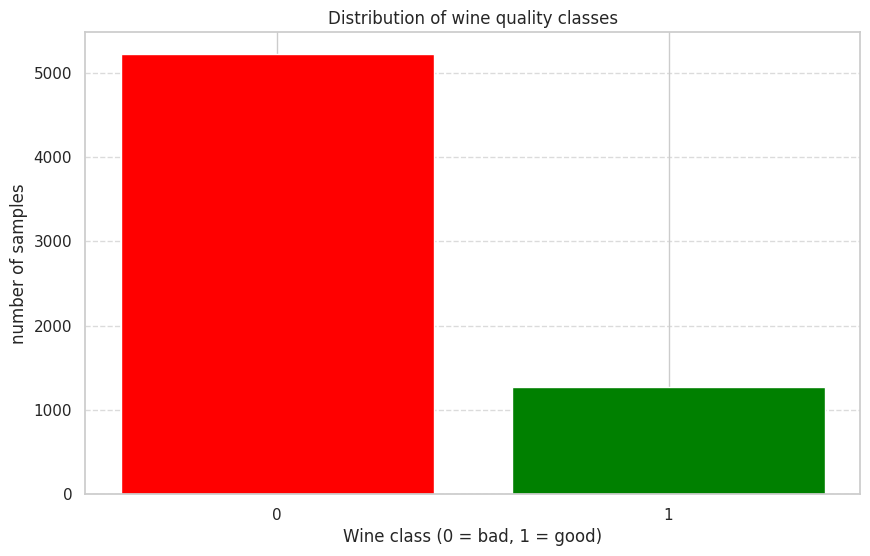

In [36]:
## plot count of good vs bad wine samples
# count of each class
class_counts = target.value_counts().sort_index()

# custom colors: 0 = red, 1 = green
colors = ['red', 'green']

# draw bar plot manually for full control
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(class_counts.index.astype(str), class_counts.values, color=colors)

# label and style
ax.set_title("Distribution of wine quality classes")
ax.set_xlabel("Wine class (0 = bad, 1 = good)")
ax.set_ylabel("number of samples")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# **6. Prediction of Wine Quality**

## 6.a. Logistic Regression Prediction.

In [46]:
from sklearn.model_selection import train_test_split
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=7
)


In [51]:
# set up logistic regression model and hyperparameter grid
model = LogisticRegression(max_iter=500)

# use only valid solver/penalty pairs
param_grid1 = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [50, 10, 1.0, 0.1, 0.01]
}

# add lbfgs separately with l2 only
param_grid2 = {
    'solver': ['lbfgs'],
    'penalty': ['l2'],
    'C': [50, 10, 1.0, 0.1, 0.01]
}

param_grid3 = {
    'solver': ['newton-cg'],
    'penalty': ['l2'],
    'C': [50, 10, 1.0, 0.1, 0.01]
}
# combine into a list of dicts for GridSearchCV
final_grid = [param_grid1, param_grid2, param_grid3]

# k-fold strategy
cv_strategy = KFold(n_splits=5, random_state=100, shuffle=True)

# grid search
grid = GridSearchCV(
    estimator=model,
    param_grid=final_grid,
    scoring='accuracy',
    cv=cv_strategy,
    n_jobs=-1,
    error_score=0
)

# fit and show result
grid_result = grid.fit(X_train, y_train)

print("Best Logistic Regression Accuracy: %.5f using %s" % (
    grid_result.best_score_, grid_result.best_params_
))



best logistic regression accuracy: 0.81589 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In this step, we evaluate the best logistic regression model from grid search by applying it to the test set.

We calculate key classification metrics such as accuracy, precision, recall, and f1-score, and visualize the confusion matrix to understand prediction distribution, Confusion Matrix:

[ [ TN FP]

[  FN TP] ]

TN = predicted 0, actual 0

FP = predicted 1, actual 0

FN = predicted 0, actual 1

TP = predicted 1, actual 1

This helps assess how well the model performs at distinguishing between good and bad wine.


In [56]:
# create best model with optimal hyperparameters from grid search
best_params = grid_result.best_params_
classifier = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=500
)

# train the model on the training data
classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = classifier.predict(X_test)

# import evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# calculate each metric
acc_log = accuracy_score(y_test, y_pred)
prec_log = precision_score(y_test, y_pred)
rec_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)

# store metrics in a dataframe for display
results = pd.DataFrame([['Logistic Regression', acc_log, prec_log, rec_log, f1_log]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# print the results
print(results)

# print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.825846   0.631148  0.244444  0.352403

Confusion Matrix:
 [[1265   45]
 [ 238   77]]


# 6.b. XGB Classifier Prediction

In [53]:
# define tuning grid for xgboost classifier
search_space = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200, 500],
    'objective': ['binary:logistic']
}

# create cross-validation object
folds = KFold(n_splits=10, random_state=100, shuffle=True)

# define xgboost classifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# perform grid search
search = GridSearchCV(
    estimator=model_xgb,
    param_grid=search_space,
    scoring='accuracy',
    cv=folds,
    n_jobs=-1,
    error_score=0
)

# fit the model
search_result = search.fit(X_train, y_train)

# show best combination and score
print("best xgboost accuracy: %.5f using %s" % (
    search_result.best_score_, search_result.best_params_)
)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


best xgboost accuracy: 0.87213 using {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.5}


We now evaluate the best xgboost model identified through hyperparameter tuning.

 We measure its accuracy, precision, recall, and f1-score on the test set, and print the confusion matrix to analyze misclassifications

In [54]:
# rebuild the best xgboost model using the selected parameters
from xgboost import XGBClassifier

xgb_best = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.5,
    objective='binary:logistic'
)

# train on the training data
xgb_best.fit(X_train, y_train)

# predict on the test set
pred_xgb = xgb_best.predict(X_test)

# evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

acc = accuracy_score(y_test, pred_xgb)
prec = precision_score(y_test, pred_xgb)
rec = recall_score(y_test, pred_xgb)
f1 = f1_score(y_test, pred_xgb)

# display results in a table
summary = pd.DataFrame([['XGBoost (Best)', acc, prec, rec, f1]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(summary)

# show confusion matrix
matrix = confusion_matrix(y_test, pred_xgb)
print("\nconfusion matrix:\n", matrix)



            Model  Accuracy  Precision   Recall  F1 Score
0  XGBoost (Best)  0.902769   0.791822  0.67619  0.729452

confusion matrix:
 [[1254   56]
 [ 102  213]]


# **7. Comarison Between Models**

# 7.a. Table and Plot Comparison

In [57]:
# combine both result rows into one DataFrame
comparison = pd.DataFrame([
    ['Logistic Regression', acc_log, prec_log, rec_log, f1_log],
    ['XGBoost (Best)', acc, prec, rec, f1]
], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(comparison)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.825846   0.631148  0.244444  0.352403
1       XGBoost (Best)  0.902769   0.791822  0.676190  0.729452


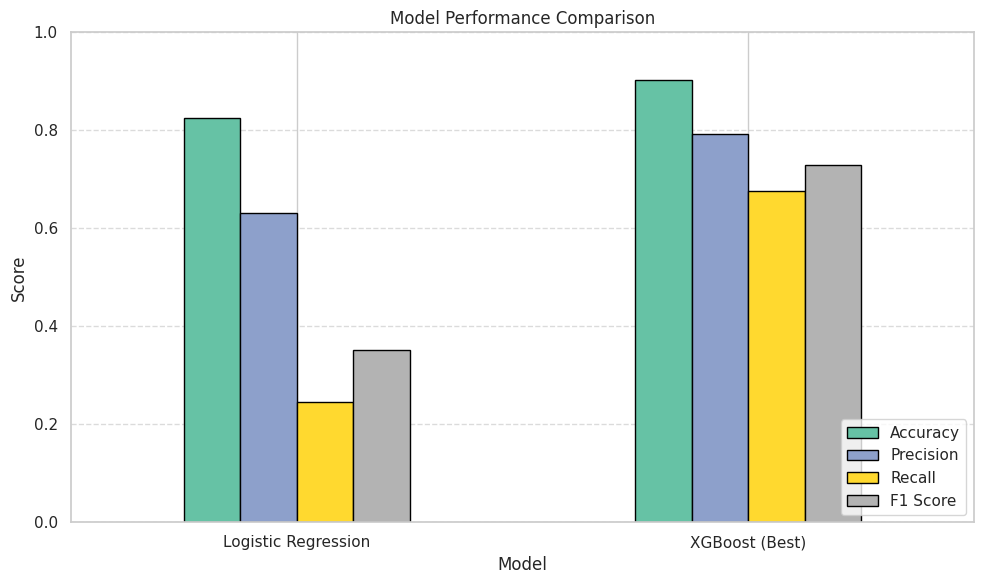

In [59]:
# plot comparison as grouped bar chart
comparison.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# 7.b. How each model seperates good vs bad wine ?
*Logistic Regression:*

1. finds a linear boundary (hyperplane) in feature space

2. tries to separate wines based on a weighted sum of features

3. interpretable: you can examine coefficients to see which features push predictions toward "good"

4. good when classes are linearly separable, but weak with complex patterns

*XGBoost:*

1. builds an ensemble of decision trees

2. separates wines using feature-based thresholds (e.g. if alcohol > 10.5 -> likely good)

3. learns non-linear interactions (e.g. high alcohol and low sulphates)

4. more accurate with complex relationships, but harder to interpret